In [56]:
import pandas as pd
import numpy as np
import re

from eunjeon import Mecab
from collections import Counter

In [57]:
df = pd.read_csv('C:/Users/junoh/OneDrive/이너피플/기타/국내특허데이터_엘지전자.csv', encoding = 'utf-8-sig')
df.head()

,번호,진행상태,출원번호,출원일자,출원년도,발명의명칭,출원인(주소포함),출원인2,IPC분류,CPC분류,...,청구항수,발명자,우선권정보,국제출원번호,국제출원일자,국제공개번호,국제공개일자,관련 출원번호,요약,청구항
0,5,등록결정(재심사후),10-2012-0012005,2012.02.06,2012,공기정화필터 및 그 제조방법(AIR CLEANING FILTER AND METHOD...,엘지전자 주식회사(서울특별시 영등포구...),엘지전자,A61L 9/013(2006.01)|A61L 9/012(2006.01)|A61L 9...,A61L 9/013(2013.01)|A61L 9/012(2013.01)|A61L 9...,...,6,이명숙(부산 남구...)|김은정(경남 창원시 성산구...)|김정연(경남 창원시 성산...,NaN,NaN,NaN,NaN,NaN,NaN,"본 발명은 공기정화필터 및 그 제조방법에 관한 것으로, 인삼추출물, 바인더 및 담체...",[청구항 1]삭제\n[청구항 2]삭제\n[청구항 3]삭제\n[청구항 4]삭제\n[청...
1,8,등록결정(일반),10-2012-0016211,2012.02.17,2012,알레르겐 불활성화 조성물 및 이를 포함하는 필터(COMPOSITION FOR INA...,엘지전자 주식회사(서울특별시 영등포구...)|(주)엔지텍(부산광역시 강서구...),엘지전자,C09D 5/00(2006.01)|B01D 39/02(2006.01)|B01D 39...,C09D 133/04(2013.01)|C09D 1/00(2013.01)|C09D 7...,...,18,이성화(서울 금천구...)|김종순(경남 김해시...)|정춘수(울산광역시 남구...)...,1020110014653 (2011.02.18) 대한민국KR,NaN,NaN,NaN,NaN,NaN,본 발명은 알레르겐 불활성화 조성물 및 이를 포함하는 필터에 관한 것이다. 본 발명...,"[청구항 1]산성 아크릴계 폴리머, 수산화 인회석, 유기 및 무기 하이브리드(hyb..."
2,45,등록결정(일반),10-2012-0076478,2012.07.13,2012,공기 청정 겸용 가습기(Humidifier combined air cleaner),엘지전자 주식회사(서울특별시 영등포구...),엘지전자,F24F 11/30(2018.01)|F24F 3/14(2006.01)|F24F 3/...,F24F 11/30(2018.01)|F24F 3/14(2021.01)|F24F 3/...,...,11,양수영(경남 창원시 성산구...)|손자희(경남 창원시 성산구...)|이정현(경남 창...,NaN,NaN,NaN,NaN,NaN,NaN,"본 발명에 따른 공기 청정 겸용 가습기는, 공기 청정 기능과, 공기 가습 기능, 그...",[청구항 1]공기 가습을 위한 가습부;공기 청정을 위한 청정부;공기 제균을 위한 제...
3,70,등록결정(일반),10-2012-0105834,2012.09.24,2012,일회용 캡슐을 이용하는 정전 무화 장치(Electrostatic atomizing ...,엘지전자 주식회사(서울특별시 영등포구...),엘지전자,B05B 5/025(2006.01)|B05B 5/035(2006.01),B05B 5/035(2013.01)|B05B 5/025(2013.01),...,5,김우진(서울 금천구...)|박형호(서울 금천구...)|전종선(서울 금천구...)|최...,NaN,NaN,NaN,NaN,NaN,NaN,"본 발명은, 일회용 캡슐을 이용하는 정전 무화 장치에 관한 것으로, 예를 들어, 다...",[청구항 1]기능성 수용액이 함침된 다공성 매체의 방출핀; 상기 기능성 수용액이 자...
4,72,등록결정(재심사후),10-2012-0109094,2012.09.28,2012,이동식 이온 발생 장치(Movable Ionizer),엘지전자 주식회사(서울특별시 영등포구...),엘지전자,F24F 8/30(2021.01)|F24F 11/65(2018.01)|F24F 11...,F24F 8/30(2021.01)|F24F 11/65(2018.01)|F24F 11...,...,7,박동률(서울 금천구...)|윤경수(서울 금천구...)|이장우(서울 금천구...)|성...,NaN,NaN,NaN,NaN,NaN,NaN,"본 발명에 따른 이동식 이온 발생 장치는, 예를 들어, 공기 조화기 또는 공기 청정...","[청구항 1]공기 조화기 또는 공기 청정기의 기류 토출 부위에 설치되되, 이온을 발..."


In [58]:
df.drop_duplicates().dropna()

,번호,진행상태,출원번호,출원일자,출원년도,발명의명칭,출원인(주소포함),출원인2,IPC분류,CPC분류,...,청구항수,발명자,우선권정보,국제출원번호,국제출원일자,국제공개번호,국제공개일자,관련 출원번호,요약,청구항


In [59]:
df.info()
df.isnull().sum()
# 요약을 활용하여 Topic Modeling을 진행 계획. 요약에는 결측치가 없슴. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   번호         344 non-null    int64  
 1   진행상태       344 non-null    object 
 2   출원번호       344 non-null    object 
 3   출원일자       344 non-null    object 
 4   출원년도       344 non-null    int64  
 5   발명의명칭      344 non-null    object 
 6   출원인(주소포함)  344 non-null    object 
 7   출원인2       344 non-null    object 
 8   IPC분류      344 non-null    object 
 9   CPC분류      344 non-null    object 
 10  공고번호       0 non-null      float64
 11  공고일자       344 non-null    object 
 12  공개번호       307 non-null    object 
 13  공개일자       307 non-null    object 
 14  등록번호       344 non-null    object 
 15  등록일자       344 non-null    object 
 16  원출원번호      92 non-null     object 
 17  원출원번호일자    92 non-null     object 
 18  심사청구여부/일자  344 non-null    object 
 19  청구항수       344 non-null    int64  
 20  발명자       

번호             0
진행상태           0
출원번호           0
출원일자           0
출원년도           0
발명의명칭          0
출원인(주소포함)      0
출원인2           0
IPC분류          0
CPC분류          0
공고번호         344
공고일자           0
공개번호          37
공개일자          37
등록번호           0
등록일자           0
원출원번호        252
원출원번호일자      252
심사청구여부/일자      0
청구항수           0
발명자            0
우선권정보        285
국제출원번호       344
국제출원일자       344
국제공개번호       344
국제공개일자       344
관련 출원번호      205
요약             0
청구항            0
dtype: int64

##### 데이터 전처리

In [60]:
simple = df.요약.tolist()
simple[342:344]

['본 발명에 따른 의류 처리 장치는, 의류를 수용하는 처리 공간을 형성하는 케비닛; 통과하는 공기 중 먼지를 걸러내는 필터부를 구비하는 필터 모듈; 상기 처리 공간 내로 공기가 토출되도록 상기 공기를 안내하는 복수의 유로가 기설정된 공기 유로; 상기 공기 유로 상의 공기를 이동시키는 팬; 상기 공기 유로 상에 배치되고, 소정의 회전축에 따라 회전함에 따라 상기 공기 유로를 변경시키는 하나의 밸브; 상기 밸브를 회전시키는 밸브 작동 모듈; 및 상기 복수의 유로 중 어느 하나가 선택되도록 상기 밸브의 회전각을 제어하는 제어부를 포함한다. 상기 복수의 유로는, 상기 필터부를 우회하도록 상기 공기를 안내하는 적어도 하나의 우회 유로; 및 상기 필터부를 통과하도록 상기 공기를 안내하는 적어도 하나의 필터링 유로를 포함한다.',
 '본 발명은 이동 단말기의 살균 탈취 장치에 관한 것이다. 일 측면에 따른 살균 탈취 장치는, 외형을 형성하는 프레임; 상기 프레임의 일측에 구비되며 플라즈마 영역을 형성하여 다수의 이온을 생성하는 플라즈마 유닛; 및 상기 플라즈마 유닛과 이격되는 상기 프레임의 타측에 구비되는 필터 유닛을 포함하며, 상기 필터 유닛은, 공기가 통과 가능하도록 다수의 통공이 형성된 필터 프레임; 및 상기 필터 프레임에 코팅되어 광촉매 반응하는 광촉매를 포함한다.']

In [61]:
# 정규표현식
reg_ex = []

for i in range(len(simple)):
    text = re.sub('^[ㄱ-힣0-9]', ' ', str(simple[i]))
    reg_ex.append(text)

reg_ex[342:344]

['  발명에 따른 의류 처리 장치는, 의류를 수용하는 처리 공간을 형성하는 케비닛; 통과하는 공기 중 먼지를 걸러내는 필터부를 구비하는 필터 모듈; 상기 처리 공간 내로 공기가 토출되도록 상기 공기를 안내하는 복수의 유로가 기설정된 공기 유로; 상기 공기 유로 상의 공기를 이동시키는 팬; 상기 공기 유로 상에 배치되고, 소정의 회전축에 따라 회전함에 따라 상기 공기 유로를 변경시키는 하나의 밸브; 상기 밸브를 회전시키는 밸브 작동 모듈; 및 상기 복수의 유로 중 어느 하나가 선택되도록 상기 밸브의 회전각을 제어하는 제어부를 포함한다. 상기 복수의 유로는, 상기 필터부를 우회하도록 상기 공기를 안내하는 적어도 하나의 우회 유로; 및 상기 필터부를 통과하도록 상기 공기를 안내하는 적어도 하나의 필터링 유로를 포함한다.',
 '  발명은 이동 단말기의 살균 탈취 장치에 관한 것이다. 일 측면에 따른 살균 탈취 장치는, 외형을 형성하는 프레임; 상기 프레임의 일측에 구비되며 플라즈마 영역을 형성하여 다수의 이온을 생성하는 플라즈마 유닛; 및 상기 플라즈마 유닛과 이격되는 상기 프레임의 타측에 구비되는 필터 유닛을 포함하며, 상기 필터 유닛은, 공기가 통과 가능하도록 다수의 통공이 형성된 필터 프레임; 및 상기 필터 프레임에 코팅되어 광촉매 반응하는 광촉매를 포함한다.']

#####  명사 추출

In [62]:
from konlpy.tag import Okt

tagger = Okt()

In [63]:
noun =  []

for i in range(len(reg_ex)):
    noun.append(tagger.nouns(reg_ex[i]))
    print(str(i) + '번째 수행 중')

0번째 수행 중
1번째 수행 중
2번째 수행 중
3번째 수행 중
4번째 수행 중
5번째 수행 중
6번째 수행 중
7번째 수행 중
8번째 수행 중
9번째 수행 중
10번째 수행 중
11번째 수행 중
12번째 수행 중
13번째 수행 중
14번째 수행 중
15번째 수행 중
16번째 수행 중
17번째 수행 중
18번째 수행 중
19번째 수행 중
20번째 수행 중
21번째 수행 중
22번째 수행 중
23번째 수행 중
24번째 수행 중
25번째 수행 중
26번째 수행 중
27번째 수행 중
28번째 수행 중
29번째 수행 중
30번째 수행 중
31번째 수행 중
32번째 수행 중
33번째 수행 중
34번째 수행 중
35번째 수행 중
36번째 수행 중
37번째 수행 중
38번째 수행 중
39번째 수행 중
40번째 수행 중
41번째 수행 중
42번째 수행 중
43번째 수행 중
44번째 수행 중
45번째 수행 중
46번째 수행 중
47번째 수행 중
48번째 수행 중
49번째 수행 중
50번째 수행 중
51번째 수행 중
52번째 수행 중
53번째 수행 중
54번째 수행 중
55번째 수행 중
56번째 수행 중
57번째 수행 중
58번째 수행 중
59번째 수행 중
60번째 수행 중
61번째 수행 중
62번째 수행 중
63번째 수행 중
64번째 수행 중
65번째 수행 중
66번째 수행 중
67번째 수행 중
68번째 수행 중
69번째 수행 중
70번째 수행 중
71번째 수행 중
72번째 수행 중
73번째 수행 중
74번째 수행 중
75번째 수행 중
76번째 수행 중
77번째 수행 중
78번째 수행 중
79번째 수행 중
80번째 수행 중
81번째 수행 중
82번째 수행 중
83번째 수행 중
84번째 수행 중
85번째 수행 중
86번째 수행 중
87번째 수행 중
88번째 수행 중
89번째 수행 중
90번째 수행 중
91번째 수행 중
92번째 수행 중
93번째 수행 중
94번째 수행 중
95번째 수행 중
96번째 수행 중
97번째 수행 중
98번째 수행 중
99번째 수행 중
100번째 수행 중

In [64]:
print(noun)

[['발명', '공기', '정화', '필터', '및', '그', '방법', '관', '것', '인삼', '추출', '물', '바인더', '및', '담체', '포함', '공기', '정화', '필터', '및', '그', '방법', '제공', '발명', '박테리아', '바이러스', '진균', '등', '미생물', '제거', '살균', '효과', '공기청정기', '능', '항균', '탈취', '기능', '제공', '수', '인체', '정화', '필터', '제공'], ['발명', '알레르겐', '불', '활성화', '조성', '물', '및', '포함', '필터', '관', '것', '발명', '구체', '산성', '아크릴', '폴리머', '수산화', '인회석', '유기', '및', '무기', '하이브리드', '바인더', '및', '표면', '콜로', '달', '실리카', '를', '포함', '알레르겐', '불', '활성화', '조성', '물', '및', '포함', '필터', '관', '것', '발명', '알레르겐', '불', '활성화', '물', '알레르겐', '화학', '결합', '수', '상기', '물', '포함', '공기', '정화', '용', '필터', '공기', '정화', '및', '조화', '용도', '알레르겐', '불', '활성화', '수'], ['발명', '공기', '청정', '겸용', '가습기', '공기', '청정', '기능', '공기', '기능', '공기', '균', '기능', '중', '하나', '이상', '수행', '동안', '현재', '수행', '여러', '동작', '및', '상태', '등', '본체', '전면', '설치', '다수', '엘이디', '이용', '형상', '애니메이션', '등', '표시', '함', '사용자', '현재', '동작', '상태', '감성', '인식', '수', '또한', '공기', '청정', '겸용', '가습기', '제품', '디자인', '심플', '구현', '수', '사용자', '편의', '성과', '만족도', '동시

In [65]:
# 한 글자 삭제

file_noun = noun.copy()

for index, word in enumerate(file_noun) :
    for i, w in enumerate(word):
        if len(w) < 2 : 
            file_noun[index].pop(i)
print(file_noun[:2])

[['발명', '공기', '정화', '필터', '그', '방법', '것', '인삼', '추출', '바인더', '담체', '포함', '공기', '정화', '필터', '그', '방법', '제공', '발명', '박테리아', '바이러스', '진균', '미생물', '제거', '살균', '효과', '공기청정기', '항균', '탈취', '기능', '제공', '인체', '정화', '필터', '제공'], ['발명', '알레르겐', '활성화', '조성', '및', '포함', '필터', '것', '발명', '구체', '산성', '아크릴', '폴리머', '수산화', '인회석', '유기', '무기', '하이브리드', '바인더', '표면', '콜로', '실리카', '포함', '알레르겐', '활성화', '조성', '및', '포함', '필터', '것', '발명', '알레르겐', '활성화', '알레르겐', '화학', '결합', '상기', '포함', '공기', '정화', '필터', '공기', '정화', '조화', '용도', '알레르겐', '활성화']]


In [110]:
#  불용어 사전 만들기

stopwords = '사이 토 설치 메인 배치 수용 발생 실시 장치 구비 형성 포함 상기 발명 통해 끼 건 후기 애 반 이거 짱 편 문 리 남 굳 걸 것 수 템 급 평 굿 탱 글 오뎅 주문 제품 상품 거 구매 어묵 삼진 아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓'
stop_words = stopwords.split(' ')
stop_words.append('상기 ')
print(stop_words)

['사이', '토', '설치', '메인', '배치', '수용', '발생', '실시', '장치', '구비', '형성', '포함', '상기', '발명', '통해', '끼', '건', '후기', '애', '반', '이거', '짱', '편', '문', '리', '남', '굳', '걸', '것', '수', '템', '급', '평', '굿', '탱', '글', '오뎅', '주문', '제품', '상품', '거', '구매', '어묵', '삼진', '아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를', '들면', '예를', '들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수', '없다', '해서는', '안된다', '뿐만', '아니라', '만이', '아니다', '만은', '아니다', '막론하고', '관계없이', '그치지', '않다', '그러나', '그런데', '하지만', '든간에', '논하지', '않다', '따지지', '않다', '설사', '비록', '더라도', '아니면', '만', '못하다', '하는', '편이', '낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이', '외에', '이', '밖에', '하여야', '비로소', '한다면', '몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할', '생각이다', '하려고하다', '이리하여', '그리하여', '그렇게', '함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다'

In [111]:
for index, word in enumerate(file_noun):
    for i, w in enumerate(word):
        
        if w in stop_words:
            file_noun[index].pop(i)
print(file_noun[:2])
        

[['공기', '정화', '필터', '방법', '인삼', '추출', '바인더', '담체', '공기', '정화', '필터', '방법', '제공', '박테리아', '바이러스', '진균', '미생물', '제거', '살균', '효과', '공기청정기', '항균', '탈취', '기능', '제공', '인체', '정화', '필터', '제공'], ['알레르겐', '활성화', '조성', '필터', '구체', '산성', '아크릴', '폴리머', '수산화', '인회석', '유기', '무기', '하이브리드', '바인더', '표면', '콜로', '실리카', '알레르겐', '활성화', '조성', '필터', '알레르겐', '활성화', '알레르겐', '화학', '결합', '공기', '정화', '필터', '공기', '정화', '조화', '용도', '알레르겐', '활성화']]


##### LDA 사전 제작

In [93]:
import gensim
import warnings
warnings.filterwarnings('ignore')

In [112]:
# dictionary 만들기

from gensim.corpora.dictionary import Dictionary
dictionary = gensim.corpora.Dictionary(file_noun)
print(dictionary.token2id)

{'공기': 0, '공기청정기': 1, '기능': 2, '담체': 3, '미생물': 4, '바이러스': 5, '바인더': 6, '박테리아': 7, '방법': 8, '살균': 9, '인삼': 10, '인체': 11, '정화': 12, '제거': 13, '제공': 14, '진균': 15, '추출': 16, '탈취': 17, '필터': 18, '항균': 19, '효과': 20, '결합': 21, '구체': 22, '무기': 23, '산성': 24, '수산화': 25, '실리카': 26, '아크릴': 27, '알레르겐': 28, '용도': 29, '유기': 30, '인회석': 31, '조성': 32, '조화': 33, '콜로': 34, '폴리머': 35, '표면': 36, '하이브리드': 37, '화학': 38, '활성화': 39, '가습기': 40, '감성': 41, '겸용': 42, '구현': 43, '동시': 44, '동작': 45, '디자인': 46, '만족도': 47, '본체': 48, '사용자': 49, '상태': 50, '성과': 51, '수행': 52, '심플': 53, '애니메이션': 54, '엘이디': 55, '여러': 56, '이용': 57, '인식': 58, '전면': 59, '청정': 60, '편의': 61, '표시': 62, '향상': 63, '현재': 64, '형상': 65, '공조': 66, '교체': 67, '기기': 68, '다공': 69, '동부': 70, '레이': 71, '마련': 72, '매체': 73, '방지': 74, '방출': 75, '사용': 76, '삽입': 77, '서로': 78, '선도': 79, '성분': 80, '수용액': 81, '스케일링': 82, '에어컨': 83, '유지': 84, '일회용': 85, '잭': 86, '저하': 87, '정전': 88, '청정기': 89, '캡슐': 90, '함침': 91, '현상': 92, '혼합': 93, '가전': 94, '감지': 95, '기류': 96, '도록': 

In [113]:
corpus = [dictionary.doc2bow(text) for text in file_noun]
print(corpus[342:344])

[[(0, 10), (18, 5), (97, 1), (109, 1), (146, 3), (147, 1), (164, 2), (167, 2), (194, 1), (198, 1), (237, 2), (245, 1), (296, 4), (309, 1), (339, 1), (350, 1), (449, 9), (456, 3), (537, 1), (617, 4), (693, 3), (891, 1), (892, 2), (894, 1), (896, 2)], [(0, 1), (9, 2), (17, 2), (18, 4), (106, 1), (135, 1), (149, 1), (151, 4), (198, 1), (223, 1), (237, 1), (250, 1), (366, 3), (434, 1), (435, 2), (436, 1), (437, 1), (438, 1), (439, 5)]]


In [114]:
#### LDA 모델 구축

numbers = 10

model = gensim.models.ldamodel.LdaModel(
                        corpus = corpus,
                        id2word = dictionary,
                        num_topics = numbers,
                        random_state = 1007)


In [115]:
model.show_topics(formatted = True)

[(0,
  '0.079*"공기" + 0.052*"필터" + 0.037*"흡입" + 0.026*"유로" + 0.023*"부재" + 0.023*"프레임" + 0.019*"모터" + 0.017*"공간" + 0.016*"회전" + 0.014*"방향"'),
 (1,
  '0.072*"공기" + 0.022*"케이스" + 0.022*"모듈" + 0.021*"흡입" + 0.018*"내부" + 0.018*"유동" + 0.016*"가이드" + 0.013*"필터" + 0.013*"방향" + 0.013*"유로"'),
 (2,
  '0.048*"어셈블리" + 0.038*"필터" + 0.021*"케이스" + 0.017*"용공" + 0.014*"공기" + 0.013*"본체" + 0.013*"위치" + 0.012*"흡입" + 0.012*"커버" + 0.012*"내부"'),
 (3,
  '0.091*"공기" + 0.025*"유동" + 0.022*"출구" + 0.021*"청정기" + 0.018*"분리" + 0.017*"먼지" + 0.015*"흡입" + 0.014*"청정" + 0.013*"모듈" + 0.012*"전극"'),
 (4,
  '0.062*"공기" + 0.033*"흡입" + 0.024*"바디" + 0.021*"전극" + 0.017*"청정기" + 0.015*"필터" + 0.015*"정보" + 0.014*"면" + 0.014*"복수" + 0.013*"수조"'),
 (5,
  '0.033*"공기" + 0.023*"필터" + 0.019*"모듈" + 0.018*"프레임" + 0.016*"박스" + 0.014*"더스트" + 0.014*"전압" + 0.013*"방향" + 0.013*"연결" + 0.012*"응축"'),
 (6,
  '0.031*"공기" + 0.029*"케이스" + 0.018*"유동" + 0.016*"출구" + 0.016*"복수" + 0.015*"타워" + 0.013*"스페이스" + 0.013*"흡입" + 0.011*"급수" + 0.011*"필름"'),
 (7,
  '0.028*"

In [116]:
#  최적화 된 Topic 수 찾기

from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LdaModel

min_topics, max_topics = 5, 20

coherence_scores = []

for num_topics in range(min_topics, max_topics):
    model = LdaModel(corpus = corpus, id2word = dictionary, num_topics = num_topics)
    coherence = CoherenceModel ( model = model,
                                                       texts = file_noun, 
                                                       dictionary = dictionary)
    
    coherence_scores.append(coherence.get_coherence())

print(coherence_scores)

[0.31334546044690004, 0.310614076507673, 0.29519463820399705, 0.29993684724468606, 0.33883016219147, 0.33285793460137125, 0.2958307725637321, 0.32828717468480845, 0.3432977251846635, 0.331762518894503, 0.3167670945660672, 0.35223309300334815, 0.30170039191382597, 0.3082755708036986, 0.33478816366196856]


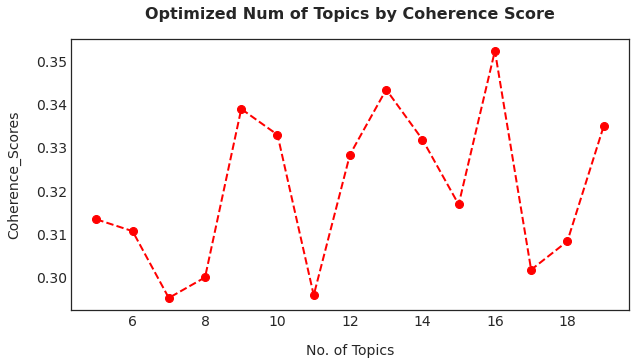

In [117]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'NaumGothic'
plt.rcParams['font.size'] = 14

x = [int(i) for i in range(min_topics, max_topics)]

plt.figure(figsize =(10,5))
plt.plot(x, coherence_scores, 'ro--',markersize = 8, linewidth = 2)
plt.title('Optimized Num of Topics by Coherence Score', pad = 20, fontweight = 'bold', fontsize = 16)
plt.xlabel('No. of Topics', labelpad = 15)
plt.ylabel('Coherence_Scores', labelpad = 15)
plt.show()


In [118]:
lda_model = LdaModel(corpus = corpus, num_topics =7, id2word = dictionary)
topics = lda_model.print_topics(num_topics = 7)
topics

[(0,
  '0.069*"필터" + 0.053*"공기" + 0.023*"흡입" + 0.020*"프레임" + 0.016*"바디" + 0.015*"케이스" + 0.014*"유동" + 0.014*"청정기" + 0.013*"어셈블리" + 0.012*"부재"'),
 (1,
  '0.038*"공기" + 0.037*"복수" + 0.026*"방향" + 0.021*"방전" + 0.021*"전극" + 0.021*"가이드" + 0.015*"모듈" + 0.015*"공간" + 0.014*"필름" + 0.011*"내부"'),
 (2,
  '0.045*"공기" + 0.028*"수조" + 0.022*"모듈" + 0.022*"유로" + 0.019*"흡입" + 0.017*"에어" + 0.017*"출구" + 0.014*"케이스" + 0.014*"내부" + 0.013*"급수"'),
 (3,
  '0.069*"공기" + 0.023*"필터" + 0.019*"흡입" + 0.015*"어셈블리" + 0.015*"유닛" + 0.014*"실외" + 0.012*"케이스" + 0.011*"내부" + 0.010*"커버" + 0.010*"공간"'),
 (4,
  '0.096*"공기" + 0.041*"흡입" + 0.027*"출구" + 0.023*"유동" + 0.018*"유닛" + 0.017*"본체" + 0.016*"필터" + 0.016*"청정기" + 0.016*"케이스" + 0.013*"상부"'),
 (5,
  '0.047*"공기" + 0.041*"흡입" + 0.029*"먼지" + 0.029*"분리" + 0.022*"모터" + 0.022*"싸이클론" + 0.015*"배출" + 0.014*"필터" + 0.013*"제어" + 0.011*"위치"'),
 (6,
  '0.068*"공기" + 0.033*"유로" + 0.023*"필터" + 0.018*"흡입" + 0.015*"공간" + 0.014*"처리" + 0.014*"모듈" + 0.014*"패널" + 0.014*"방향" + 0.013*"디스플레이"')]

In [119]:
topics_df = pd.DataFrame(topics)
topics_df

,0,1
0,0,"0.069*""필터"" + 0.053*""공기"" + 0.023*""흡입"" + 0.020*""..."
1,1,"0.038*""공기"" + 0.037*""복수"" + 0.026*""방향"" + 0.021*""..."
2,2,"0.045*""공기"" + 0.028*""수조"" + 0.022*""모듈"" + 0.022*""..."
3,3,"0.069*""공기"" + 0.023*""필터"" + 0.019*""흡입"" + 0.015*""..."
4,4,"0.096*""공기"" + 0.041*""흡입"" + 0.027*""출구"" + 0.023*""..."
5,5,"0.047*""공기"" + 0.041*""흡입"" + 0.029*""먼지"" + 0.029*""..."
6,6,"0.068*""공기"" + 0.033*""유로"" + 0.023*""필터"" + 0.018*""..."


In [121]:
topics_df.to_csv('C:/Users/junoh/OneDrive/이너피플/기타/tm_엘지전자_patent.csv', encoding = 'utf-8-sig', index = False, header = True)

In [120]:
# LDA 시각화 : LDAvis

import pyLDAvis.gensim_models

vis = pyLDAvis.gensim_models.prepare(lda_model, corpus,  dictionary )
pyLDAvis.display(vis)

In [122]:
pyLDAvis.save_html(vis, 'C:/Users/junoh/OneDrive/이너피플/기타/tm_엘지전자_patent.html')